In [230]:
import glob
import cv2
import pandas as pd
import pyreadr
import numpy as np
import ntpath
import re
import time
from PIL import Image
import os
import pickle

from tqdm import tqdm

In [18]:
!pip3 install pyreadr --user

     |████████████████████████████████| 409 kB 5.4 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [143]:
path_img = "/mnt/data/home/kantek/wu/data/img/"
path_labels = "/mnt/data/home/kantek/wu/data/"

In [3]:
input_shape = (200, 200, 3)
num_classes = 2
num_test = 200

In [66]:
### Process Images

# Get images from data_path
list_img = glob.glob(path_img + "*.png")

In [67]:
len(list_img)

201840

### Reading labels into a single Pandas data frame

In [25]:
result = pyreadr.read_r('/mnt/data/home/kantek/wu/data/axp-trv-labels.rda') # also works for Rds, rda

# done! let's see what we got
# result is a dictionary where keys are the name of objects and the values python
# objects
print(result.keys()) # let's check what objects we got
df1 = result["labels"] # extract the pandas data frame for object df1

odict_keys(['labels'])


In [151]:
labels_df = pd.DataFrame()

In [170]:
for label_file_path in tqdm(list_labels):
    label_file_name = ntpath.basename(label_file_path)
    label_df = pyreadr.read_r(label_file_path)
    ticker = label_file_name[:label_file_name.rfind('-')]
    labels_df[ticker] = label_df['labels']['labels'].to_numpy()#.rename(columns={'labels': ticker}))

100%|██████████| 870/870 [00:03<00:00, 256.13it/s]


In [192]:
labels_df['ibm-v']

1.0

In [147]:
df1

,labels
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
227,1.0
228,1.0
229,1.0
230,0.0


In [144]:
list_labels = glob.glob(path_labels + "*.rda")

In [136]:
os.listdir(path_labels)

['ibm-v-labels.rda',
 'vz-dow-labels.rda',
 'cat-gs-labels.rda',
 'gs-aapl-labels.rda',
 'mmm-dis-labels.rda',
 'gs-cat-labels.rda',
 'wmt-intc-labels.rda',
 'dis-vz-labels.rda',
 'gs-wmt-labels.rda',
 'cvx-cat-labels.rda',
 'crm-ibm-labels.rda',
 'jpm-crm-labels.rda',
 'gs-mmm-labels.rda',
 'vz-mmm-labels.rda',
 'trv-dis-labels.rda',
 'mcd-ba-labels.rda',
 'jnj-wmt-labels.rda',
 'mmm-crm-labels.rda',
 'ibm-dow-labels.rda',
 'vz-ko-labels.rda',
 'gs-msft-labels.rda',
 'ba-cvx-labels.rda',
 'cat-dis-labels.rda',
 'jpm-aapl-labels.rda',
 'hon-ibm-labels.rda',
 'mmm-wmt-labels.rda',
 'aapl-jpm-labels.rda',
 'cat-csco-labels.rda',
 'wmt-mrk-labels.rda',
 'cvx-wmt-labels.rda',
 'csco-gs-labels.rda',
 'dis-amgn-labels.rda',
 'wba-dow-labels.rda',
 'vz-csco-labels.rda',
 'cat-hon-labels.rda',
 'dis-wba-labels.rda',
 'jnj-dow-labels.rda',
 'wmt-cat-labels.rda',
 'cvx-ko-labels.rda',
 'vz-wba-labels.rda',
 'ba-mrk-labels.rda',
 'dow-msft-labels.rda',
 'cat-nke-labels.rda',
 'dow-mrk-labels.rda'

In [42]:
list_pairs_img.sort(key=float)
list_pairs_img

ValueError: could not convert string to float: '/mnt/data/home/kantek/wu/data/img/axp-trv1.png'

In [64]:
def get_ticker_index(s):
    head = s.split('.')[0].rstrip('0123456789')
    tail = s[len(head):len(s) - 4]
    return head, tail

### Labels to Pandas Data Frame

In [231]:
with open('data_train', 'wb') as f:
    pickle.dump(data_train, f)

In [232]:
with open('data_labels', 'wb') as f:
    pickle.dump(data_labels, f)

In [ ]:
list_labels = 

In [217]:
data_train = []

In [218]:
data_labels = []

In [219]:
for image_path in tqdm(list_img):
    image_name = ntpath.basename(image_path)
    ticker, label_idx = get_ticker_index(image_name)
    img = cv2.imread(image_path)
    data_train.append(img)
    data_labels.append(labels_df[ticker].loc[int(label_idx) - 1])

100%|██████████| 201840/201840 [28:03<00:00, 119.86it/s] 


In [221]:
len(data_labels)

201840

In [222]:
np_data_train = np.array(data_train)

In [223]:
np_data_labels = np.array(data_labels)

In [226]:
np_data_train.shape

(201840, 200, 200, 3)

In [27]:
df1

,labels
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
227,1.0
228,1.0
229,1.0
230,0.0


In [75]:
# Convert images into numpy arrays

start = time.time()
imgs = np.array([cv2.imread(f) for f in list_img[10000:20000]])
end = time.time()
print(f"code took {end - start} sec. to execute")

code took 61.521174907684326 sec. to execute


In [116]:
imgs = np.array([cv2.imread(f) for f in tqdm(list_img)])



  0%|          | 0/201840 [00:00<?, ?it/s]

  0%|          | 20/201840 [00:00<17:12, 195.44it/s]

  0%|          | 41/201840 [00:00<16:44, 200.88it/s]

  0%|          | 62/201840 [00:00<16:26, 204.47it/s]

  0%|          | 86/201840 [00:00<15:37, 215.29it/s]

  0%|          | 108/201840 [00:00<15:48, 212.71it/s]

  0%|          | 130/201840 [00:00<16:06, 208.71it/s]

  0%|          | 153/201840 [00:00<15:40, 214.48it/s]

  0%|          | 177/201840 [00:00<15:07, 222.12it/s]

  0%|          | 200/201840 [00:00<15:12, 220.95it/s]

  0%|          | 223/201840 [00:01<15:37, 215.02it/s]

  0%|          | 245/201840 [00:01<15:39, 214.51it/s]

  0%|          | 267/201840 [00:01<15:38, 214.82it/s]

  0%|          | 289/201840 [00:01<15:35, 215.48it/s]

  0%|          | 313/201840 [00:01<15:05, 222.64it/s]

  0%|          | 336/201840 [00:01<15:05, 222.62it/s]

  0%|          | 360/201840 [00:01<14:51, 226.01it/s]

  0%|          | 386/201840 [00:01<14:21, 233.93it/s]

  0%|          | 411/20

KeyboardInterrupt: 

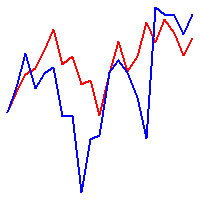

In [113]:
import imageio
# Image.fromarray(np.asarray(Image.open(list_img[1])), 'RGB')
Image.fromarray(imageio.imread(list_img[1]))
# type(np.asarray(Image.open(list_img[1])))

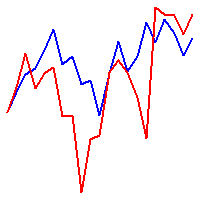

In [79]:
cv2.imread(list_img[1])
Image.fromarray(cv2.imread(list_img[1]), 'RGB')


In [ ]:
# Read Labels
labels = pd.read_csv(file_labels)

In [227]:
val_size = 20000

In [229]:
# Train test split and normalize RGB values
x_train = np.multiply(np_data_train[:len(np_data_train) - val_size], 1/255) 
x_test  = np.multiply(np_data_train[len(np_data_train) - val_size:], 1/255)

y_train = np_data_labels[:len(np_data_train) - val_size] 
y_test  = np_data_labels[len(np_data_train) - val_size:]

KeyboardInterrupt: 